In [45]:
import tensorflow as tf
from keras import datasets, layers, callbacks, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

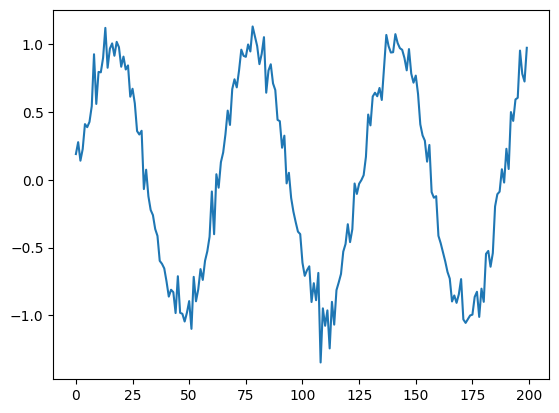

In [46]:
series = np.sin(0.1*np.arange(200))
series += np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [47]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

print('X shape:', np.array(X).shape)

X shape: (190, 10, 1)


In [48]:
i = layers.Input(shape=(T, D))
# x = layers.SimpleRNN(5, activation=None)(i)
x = layers.SimpleRNN(5, activation='relu')(i)
# x = layers.SimpleRNN(5)(i)
x = layers.Dense(1)(x)
model = models.Model(i, x)
model.compile(
    optimizer=optimizers.Adam(0.1),
    loss='mse'
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
    # callbacks=[early_stopping]
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 4.4886 - val_loss: 0.5310
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6082 - val_loss: 0.4989
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5315 - val_loss: 0.2611
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3456 - val_loss: 0.2179
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2735 - val_loss: 0.1497
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1870 - val_loss: 0.0783
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0975 - val_loss: 0.0580
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0617 - val_loss: 0.0424
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0362 - val_loss: 0.0302
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0299 - val_loss: 0.0308
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0301 - val_loss: 0.0286
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0218 - val_loss: 0.0290


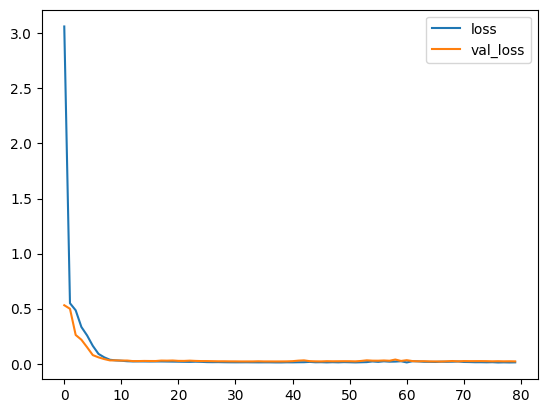

In [49]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [50]:
# Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar

    # update the predictions list
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

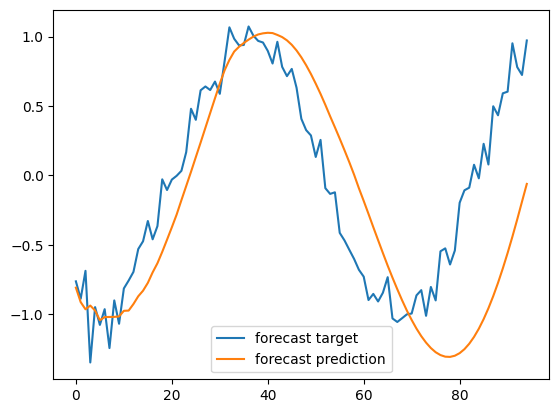

In [51]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()